# Part 0: Regular expression 

In [2]:
import urllib2  # the lib that handles the url stuff
import re

# Get the text from the url
data = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt')

# use regular expression to find all 4 digit numbers
re_string = r"\b\d{4}\b"
for line in data: # files are iterable
    if re.findall(re_string,line) != []:
        print re.findall(re_string,line)
    

['1234']
['9999']


### Provide an example of regex, to match words starting with "super". 

In [2]:
import urllib2  # the lib that handles the url stuff
import re

# Get the text from the url
data = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt')

re_string = r"\bsuper[a-zA-z]*"
for line in data: # files are iterable
    if re.findall(re_string,line) != []:
        print re.findall(re_string,line)
    

['superpolaroid']
['supertaxidermy']
['superbeer']


### Extract wiki links

In [3]:
import urllib2  # the lib that handles the url stuff
import re

# Get the text from the url
data = urllib2.urlopen('https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/test.txt')

re_string = r"\[\[([^\[\]|]*)[^\[\]]*\]\]"
for line in data: # files are iterable
    if re.findall(re_string,line) != []:
        print re.findall(re_string,line)
    





['drinking vinegar']
['gentrify']
['hashtag']
['Bicycle', 'Pitchfork']


# Part A: Download Philosopher-pages from Wikipedia

In [3]:
import urllib2

philosophers = {
    "aestheticians":{
        "title":"title=List_of_aestheticians",
        "names":""
    },
    "epistemologists":{
        "title":"title=List_of_epistemologists",
        "names":""
    },
    "ethicists":{
        "title":"title=List_of_ethicists",
        "names":""
    },
    "logicians":{
        "title":"title=List_of_logicians",
        "names":""        
    },
    "metaphysicians":{
        "title":"title=List_of_metaphysicians",
        "names":""
    },
    "social and political philosophers":{
        "title":"title=Index_of_sociopolitical_thinkers",
        "names":""
    }
}

#'https://en.wikipedia.org/w/index.php?title=List_of_aestheticians&action=edit'

# set the parameters (explained in detail here https://www.mediawiki.org/wiki/API:Tutorial)
baseurl = "https://en.wikipedia.org/w/index.php?"
title = ""
action = "action=edit"

for i in philosophers:
    # construct the query
    query = "{}{}&{}".format(
    baseurl,
    philosophers[i]["title"],
    action)
    # use urllib and regex to get the list of philosophers
    wikiresponse = urllib2.urlopen(query)
    wikisource = wikiresponse.read()
    philosophers[i]["names"] = re.findall(r'\*.*?\[\[(.*?)[\]\|]', wikisource)

# Because the last 4 elements of the ethicists list and social and political philosophers are not philosophers
# they are left out
#philosophers["ethicists"]["names"] = philosophers["ethicists"]["names"][:-4]
#philosophers["social and political philosophers"]["names"] = philosophers["social and political philosophers"]["names"][:-4] 

In [4]:
len(philosophers["metaphysicians"]["names"])

96

In [5]:
all_philo = []
largestBranch = ""
temp = 0 # temp variable used to find the largest brand
for i in philosophers:
    all_philo = all_philo + philosophers[i]["names"]
    print "The number of philosophers in {} is {}".format(
        i,
        len(philosophers[i]["names"]))
    if len(philosophers[i]["names"]) > temp:
        temp = len(philosophers[i]["names"])
        largestBranch = i
        
print "\nThe largest branch of philosophy is {}".format(largestBranch)

# Check if there are some philosophers that are in more than one list
import collections

philoCounted = collections.Counter(all_philo)
nrOfDublicates =len([philo for philo,value in philoCounted.items() if value > 1])

print "\n Yes, There are {} philosophers that are in more than one link".format(nrOfDublicates)

# Find the most common ones
most_common = [philo for philo,value in philoCounted.items() if value == philoCounted.most_common(1)[0][1] ]
print("\nThe most common ones are:")

for i in most_common:
    print "  {}".format(i)

# print out everyone that appears in more than one list 
print("")
print("All philosophers that appear more than one list")
philoCounted = sorted(philoCounted.items(), key=lambda pair: pair[1], reverse=True)
for i,value in philoCounted:
    if value > 1:
        print "{}:{} number of times".format(i,value)

The number of philosophers in social and political philosophers is 338
The number of philosophers in aestheticians is 124
The number of philosophers in logicians is 278
The number of philosophers in epistemologists is 100
The number of philosophers in metaphysicians is 96
The number of philosophers in ethicists is 275

The largest branch of philosophy is social and political philosophers

 Yes, There are 120 philosophers that are in more than one link

The most common ones are:
  Thomas Aquinas
  Aristotle

All philosophers that appear more than one list
Thomas Aquinas:6 number of times
Aristotle:6 number of times
Plato:5 number of times
Bertrand Russell:5 number of times
Immanuel Kant:5 number of times
David Hume:4 number of times
Baruch Spinoza:3 number of times
Gottfried Leibniz:3 number of times
Georg Wilhelm Friedrich Hegel:3 number of times
Nelson Goodman:3 number of times
Robert Nozick:3 number of times
Ludwig Wittgenstein:3 number of times
Francis Bacon:3 number of times
Søren 

### Download all the pages

In [6]:
import json
import io

# set the parameters for the query (explained in detail here https://www.mediawiki.org/wiki/API:Tutorial)
baseurl = "https://en.wikipedia.org/w/api.php?"
actions = "action=query"
title = "titles="
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

# iterate through the philosophers and for each philosphers download his wikipedia page
# The list comprehension goes through the list of philosophers and replaces " " for "_"
for philo in [name.replace(" ","_") for name in set(all_philo)]:
    query = "{}{}&{}{}&{}&{}".format(baseurl,actions,title,philo,content,dataformat)
    print query
    wikiresponse = urllib2.urlopen(query)
    wikisource = wikiresponse.read()
    
    # Create the uri for the file in the os file system
    fileUri = "/Users/GretarAtli/Dropbox/Dtu/Social_graphs_and_interactions/Philosophers/{}.txt".format(philo)
    #print fileUri
    f = io.open(fileUri, 'w', encoding='utf-8')
    f.write(unicode(json.dumps(wikisource)))
    

https://en.wikipedia.org/w/api.php?action=query&titles=Christian_Wolff_(philosopher)&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Eli_Siegel&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Marsilius_of_Inghen&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Solomon_Passy&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Heinrich_Gustav_Hotho&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Isaiah_Berlin&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Martin_Heidegger&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Todd_May&prop=revisions&rvprop=content&format=json
https://en.wikipedia.org/w/api.php?action=query&titles=Hans_Pfitzner&prop=revisions&rvp

# Part B: Building the networks

Now, we're going to build a NetworkX directed graph of the links between pages. For each philosopher page, we'll find all the links to other characters, and for each link add an edge in the graph.

Exercise: Build the philosopher network. The combined list from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.

    - Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
    - For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.
    - Use a NetworkX DiGraph to store the network.

In [7]:
import json
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Delete duplicates in the list
all_philo = set(all_philo)

for philo in all_philo:
    # Add the philosopher to the graph
    G.add_node(philo)
    
    # Create the uri for the file in the os file system
    fileUri = "/Users/GretarAtli/Dropbox/Dtu/Social_graphs_and_interactions/Philosophers/{}.txt".format(philo.replace(" ","_"))

    # Open the file and get the content 
    file = open(fileUri) 
    theArticle = file.read()

    # use regex and the set.intersection function to find all philosophers that are linked from the 
    # wikipage of each philosopher
    linkedPhilosophers = set(re.findall(r'.*?\[\[(.*?)[\]\|]', theArticle)).intersection(all_philo)

    # Go through all the linked philosophers and add directed edge for each one
    for linkedPhilosopher in linkedPhilosophers:
        G.add_edge(philo,linkedPhilosopher)
        
    # Debugging purpose
    print "The philospher is {}\n   And the linked philo list is: {}".format(philo,linkedPhilosophers)


/Users/GretarAtli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


The philospher is Christian Wolff (philosopher)
   And the linked philo list is: set(['Thomas Aquinas', 'Confucius', 'Voltaire', 'Arthur Schopenhauer', 'Immanuel Kant', 'Aristotle', 'Moses', 'Alexander Gottlieb Baumgarten', 'Gottfried Leibniz'])
The philospher is Eli Siegel
   And the linked philo list is: set(['Immanuel Kant', 'Martin Buber', 'Aristotle', 'Heraclitus'])
The philospher is Marsilius of Inghen
   And the linked philo list is: set(['William of Ockham', 'Albert of Saxony (philosopher)', 'Jean Buridan', 'Aristotle', 'Thomas Bradwardine'])
The philospher is Solomon Passy
   And the linked philo list is: set([])
The philospher is Heinrich Gustav Hotho
   And the linked philo list is: set([])
The philospher is Isaiah Berlin
   And the linked philo list is: set(['Leo Tolstoy', 'Richard Wollheim', 'A. J. Ayer', 'Plato', 'John Stuart Mill', 'Joxe Azurmendi', 'John Rawls', 'Friedrich Nietzsche', 'Ludwig Wittgenstein', 'Johann Gottfried Herder', 'Karl Marx', 'Giambattista Vico'])
T

* Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?
* List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?
* Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common degree?
* Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
* Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.

In [8]:
print "The network statistics: \n"
print "   The total number of nodes: {} ".format(len(G.nodes()))
print "   The total number of edges: {} ".format(len(G.edges()))
print "   The average degree: {} ".format(np.mean(G.degree().values()))
print "   The median degree: {} ".format(np.median(G.degree().values()))

# Note According to the documentation of numpy.median, 
# you don't have to manually sort the data before feeding it to the function, as it does this internally. 

top10indegrees = sorted(G.in_degree().items(),key=lambda pair: pair[1], reverse=True)[:10]
top10outdegrees = sorted(G.out_degree().items(),key=lambda pair: pair[1], reverse=True)[:10]

print "\nTop 10 philosophers by in-degree: \n"
for philo,value in top10indegrees:
    print "   {} : in degree = {} ".format(philo,value)
    
print "\nTop 10 philosophers by out-degree: \n"
for philo,value in top10outdegrees:
    print "   {} : out degree = {} ".format(philo,value)


The network statistics: 

   The total number of nodes: 1048 
   The total number of edges: 4783 
   The average degree: 9.12786259542 
   The median degree: 4.0 

Top 10 philosophers by in-degree: 

   Immanuel Kant : in degree = 136 
   Aristotle : in degree = 126 
   Plato : in degree = 95 
   Karl Marx : in degree = 95 
   Bertrand Russell : in degree = 85 
   Friedrich Nietzsche : in degree = 75 
   Ludwig Wittgenstein : in degree = 69 
   David Hume : in degree = 68 
   Georg Wilhelm Friedrich Hegel : in degree = 66 
   John Stuart Mill : in degree = 59 

Top 10 philosophers by out-degree: 

   Friedrich Nietzsche : out degree = 43 
   Bertrand Russell : out degree = 41 
   Georg Wilhelm Friedrich Hegel : out degree = 40 
   Jacques Derrida : out degree = 37 
   Martin Heidegger : out degree = 36 
   Immanuel Kant : out degree = 35 
   David Hume : out degree = 35 
   Plato : out degree = 33 
   Søren Kierkegaard : out degree = 33 
   Jean-Jacques Rousseau : out degree = 33 


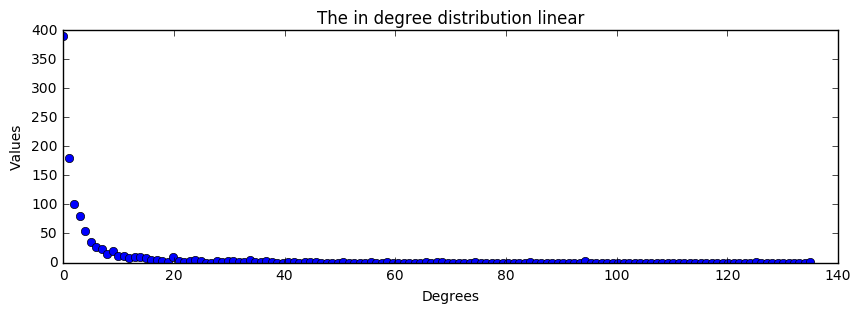

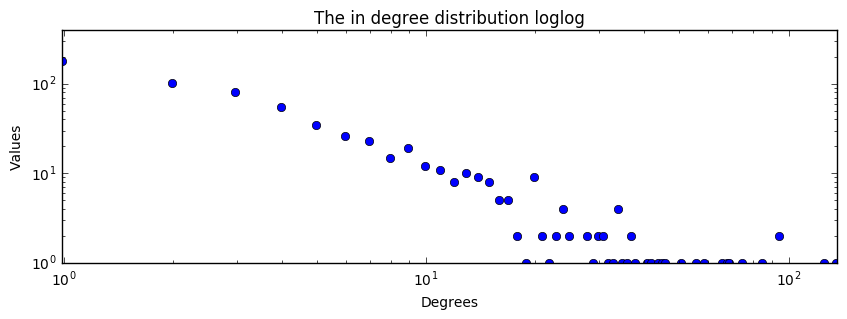

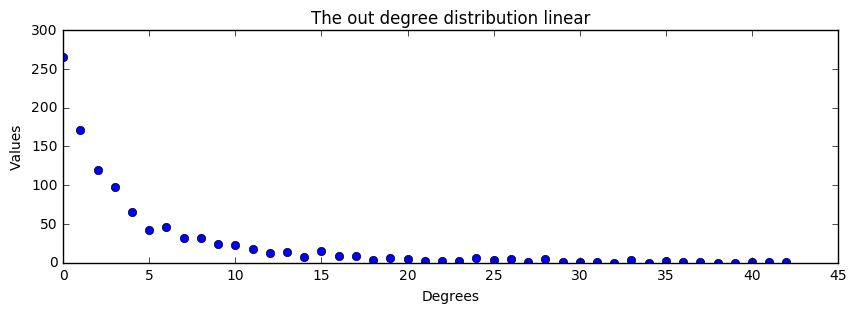

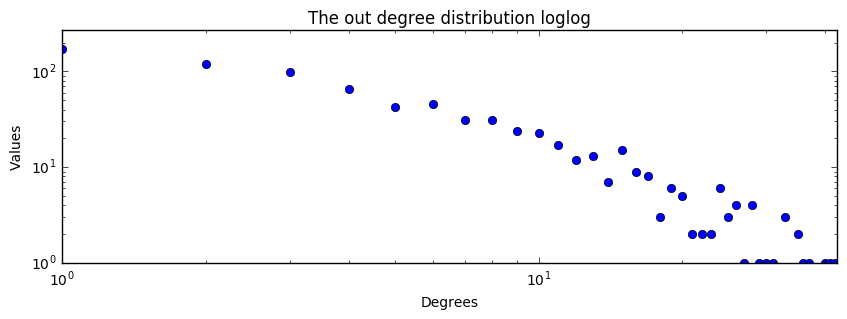

In [9]:
# Plot the in and out degrees

# lets start with the in degree
valuesIn, binsIn = np.histogram(G.in_degree().values(), bins=137)

# Plot the distribution, both linear and log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsIn[:-1], valuesIn,'o')
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("The in degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsIn[:-1], valuesIn,'o')
plt.margins(0.01,0.01)
plt.xscale('log')
plt.yscale('log')
plt.title("The in degree distribution loglog")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

# now lets check out the out degree
valuesOut, binsOut = np.histogram(G.out_degree().values(), bins=43)

# Plot the distribution, both linear and log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsOut[:-1], valuesOut,'o')
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("The out degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsOut[:-1], valuesOut,'o')
plt.margins(0.01,0.01)
plt.xscale('log')
plt.yscale('log')
plt.title("The out degree distribution loglog")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()


### Plot interpretation

The plots do not look like poission or exponential distributions. They have some characteristics of a power law distribution, like there are some philosophers that have really high out/in degrees. These are called outliers. It makes sens if you think about it. Famous philosophers like Immanuel Kant, Aristotle and Plato have a lot of cites to their wikipage from other philosopher's wikipages. A lot of modern philosophy is based on the work of these philosophers so their works will be cited alot. The outliers in the out degree are most likely new philosophers that are citeing the works of older philosophers. 

Neither distributions have loglog plots that looks completely like power law so this is not strightly a power law distribution, these distribution look simmilar to log normal distributions but the distribution lies somewhere inbetween.


** Hugmynd **: plotta up bæði poission og exponential distributions onto the graph

Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.

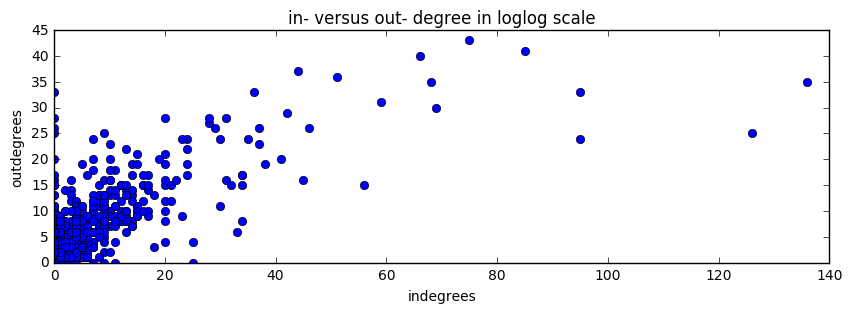

In [10]:
indegrees = [indegree for philo, indegree in sorted(G.in_degree().items(),key=lambda pair: pair[0])]
outdegrees = [outdegree for philo, outdegree in sorted(G.out_degree().items(),key=lambda pair: pair[0])]

# Plot in-versus out- degree in log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(indegrees, outdegrees,'o')

#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("in- versus out- degree in loglog scale")
plt.xlabel("indegrees")
plt.ylabel("outdegrees")
plt.show()

